In [15]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Applying Linear Lasso Regression

In [52]:
X,y = make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,noise=20,random_state=12)

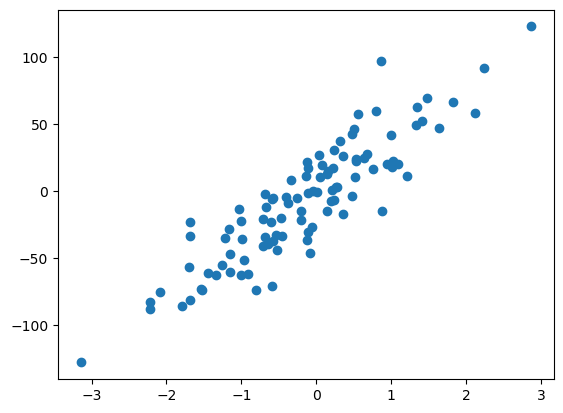

In [54]:
plt.scatter(X,y)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import Lasso

C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+04, tolerance: 1.652e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

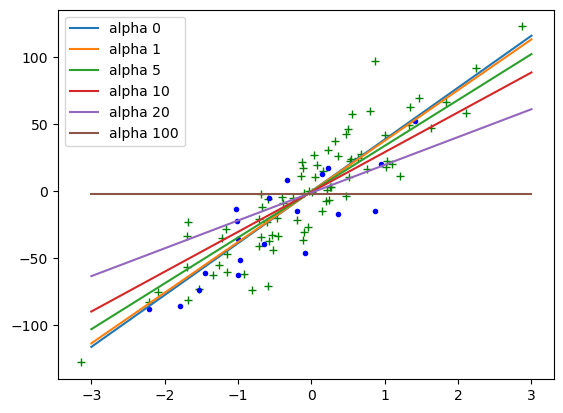

In [60]:
alphas = [0,1,5,10,20,100]
X_new = np.linspace(-3,3,100).reshape(100,1)
plt.plot(X_train,y_train,'g+')
plt.plot(X_test,y_test,'b.')
for alpha in alphas:
    lr = Lasso(alpha=alpha)
    lr.fit(X_train,y_train)
    plt.plot(X_new,lr.predict(X_new),label="alpha {}".format(alpha))

plt.legend()
plt.show()

# Applying Lasso Regression after Polynomial featuring

In [228]:
X = np.random.rand(100,1)-1
y = 50* (X**2) -0.2*X + 3 +  16*np.random.rand(100,1) 

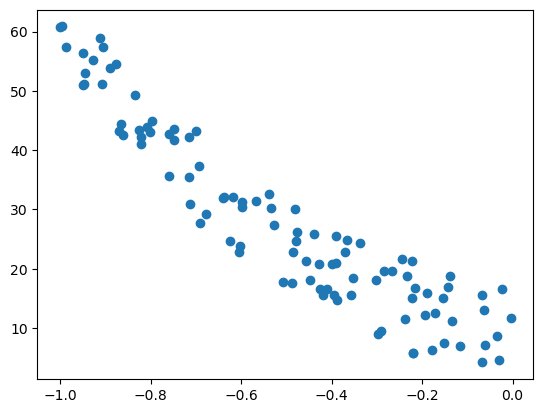

In [230]:
plt.scatter(X,y)
plt.show()

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [234]:
def get_preds_lasso(X,y,alpha):
    model = Pipeline([
        ('poly_feat',PolynomialFeatures(degree=2)),
        ('lasso',Lasso(alpha=alpha))
    ])
    model.fit(X,y)
    return model.predict(X)

C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.561e+02, tolerance: 2.357e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

[]

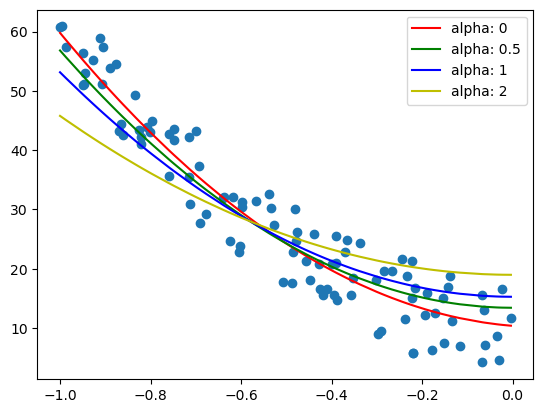

In [238]:
alphas = [0,0.5,1,2]
cs = ['r','g','b','y']

plt.scatter(X,y)
for alpha,c in zip(alphas,cs):
    preds = get_preds_lasso(X,y,alpha)
    plt.plot(sorted(X[:,0]),preds[np.argsort(X[:,0])],c,label="alpha: {}".format(alpha))

plt.legend()
plt.plot()